In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.utils import plot_model


In Anaconda Prompt, create a new environment (from the directory where the file is located 'cd {path}')
'conda env create -f tf_env.yml'

Damit tensorflow funktioniert muss eine Ältere Version von Python verwendet werde, python[version='3.10.*|3.9.*|3.8.*|3.7.*|3.6.*|3.5.*']
Kontrolle ob die richtige version verwendet wird mit  
'conda activate tf_env'  
'python --version'

Additionally the ipycerner package should be istalled. Will be proposed by VS Code when selecting or execuitng the new environment

Install graphwitz and add to systempath for current user
https://graphviz.gitlab.io/download/


# Table of contents

1. [Introduction](#introduction)
2. [Training and Visulaization](#tav)
3. [Results](#res)


## Introduction <a name="introduction"></a>
This ipynb file train a Kerasregressor Model, before following steps have to be executed manually

In Anaconda Prompt, create a new environment (from the directory where the file is located 'cd {path}')
'conda env create -f tf_env.yml'

Damit tensorflow funktioniert muss eine Ältere Version von Python verwendet werde, python[version='3.10.*|3.9.*|3.8.*|3.7.*|3.6.*|3.5.*']
Kontrolle ob die richtige version verwendet wird mit  
'conda activate tf_env'  
'python --version'

Additionally the ipycerner package should be istalled. Will be proposed by VS Code when selecting or execuitng the new environment

In [12]:
# Load the DataFrame from the pickle file
df = pd.read_pickle('final_dataframe.pkl')


In [13]:
# Define feature columns and target variable
columns_x = ['size', 'distance_hospital', 'lr_day', 'lr_night', 'distance_ov', 'wbauj', 'modern',
             'erstvermietung', 'zentral', 'see', 'neu', 'stöckig', 'traum', 'bijou', 'neubau',
             'balkon', 'charmant', 'erstbezug', '1 Zimmer', '1.5 Zimmer', '2 Zimmer', '2.5 Zimmer',
             '3 Zimmer', '3.5 Zimmer', '4 Zimmer', '4.5 Zimmer', '5 Zimmer', '5.5 Zimmer',
             '6 Zimmer', '6.5 Zimmer', '7 Zimmer', '7.5 Zimmer', 'y0', 'y1999', 'y2000', 'y2001',
             'y2003', 'y2004', 'y2005', 'y2006', 'y2008', 'y2009', 'y2010', 'y2011', 'y2012',
             'y2013', 'y2014', 'y2015', 'y2016', 'y2017', 'y2018', 'y2019', 'y2020', 'y2021',
             'y2022', 'y2023', 'y2024']

X = df[columns_x]
y = df['price']

## Training and Visulaization <a name="tav"></a>

In [14]:



def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

pipeline = Pipeline([
    ('regressor', KerasRegressor(model=create_model, epochs=50, batch_size=32, verbose=2))
])

param_grid = {
    'regressor__epochs': [50, 100],
    'regressor__batch_size': [16, 32]
}

# Example usage of GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3)

# Fit the grid search to the data
grid_result = grid.fit(X, y)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
for mean, std, param in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"{mean:.3f} ({std:.3f}) with: {param}")


Epoch 1/50
32/32 - 0s - loss: 9369655.0000 - 431ms/epoch - 13ms/step
Epoch 2/50
32/32 - 0s - loss: 5981803.0000 - 22ms/epoch - 686us/step
Epoch 3/50
32/32 - 0s - loss: 3419725.5000 - 22ms/epoch - 686us/step
Epoch 4/50
32/32 - 0s - loss: 3151472.7500 - 22ms/epoch - 685us/step
Epoch 5/50
32/32 - 0s - loss: 3014218.2500 - 23ms/epoch - 717us/step
Epoch 6/50
32/32 - 0s - loss: 2835180.2500 - 21ms/epoch - 654us/step
Epoch 7/50
32/32 - 0s - loss: 2622374.0000 - 23ms/epoch - 709us/step
Epoch 8/50
32/32 - 0s - loss: 2404921.0000 - 22ms/epoch - 691us/step
Epoch 9/50
32/32 - 0s - loss: 2227921.5000 - 22ms/epoch - 685us/step
Epoch 10/50
32/32 - 0s - loss: 1994450.6250 - 21ms/epoch - 669us/step
Epoch 11/50
32/32 - 0s - loss: 1814999.1250 - 21ms/epoch - 655us/step
Epoch 12/50
32/32 - 0s - loss: 1697566.0000 - 23ms/epoch - 711us/step
Epoch 13/50
32/32 - 0s - loss: 1611677.8750 - 22ms/epoch - 696us/step
Epoch 14/50
32/32 - 0s - loss: 1555918.3750 - 23ms/epoch - 704us/step
Epoch 15/50
32/32 - 0s - loss

In [15]:


# Model creation function
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Pipeline for KerasRegressor
pipeline = Pipeline([
    ('regressor', KerasRegressor(model=create_model, epochs=50, batch_size=32, verbose=2))
])

# Hyperparameters grid
param_grid = {
    'regressor__epochs': [50, 100],
    'regressor__batch_size': [16, 32]
}

# Example data split (replace X and y with your data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
for mean, std, param in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"{mean:.3f} ({std:.3f}) with: {param}")

# Evaluate the model on the test data
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Epoch 1/50
26/26 - 0s - loss: 11618146.0000 - 419ms/epoch - 16ms/step
Epoch 2/50
26/26 - 0s - loss: 8617055.0000 - 18ms/epoch - 689us/step
Epoch 3/50
26/26 - 0s - loss: 5821648.5000 - 18ms/epoch - 706us/step
Epoch 4/50
26/26 - 0s - loss: 3971842.7500 - 18ms/epoch - 686us/step
Epoch 5/50
26/26 - 0s - loss: 3629856.5000 - 19ms/epoch - 722us/step
Epoch 6/50
26/26 - 0s - loss: 3547208.0000 - 18ms/epoch - 702us/step
Epoch 7/50
26/26 - 0s - loss: 3435690.0000 - 19ms/epoch - 728us/step
Epoch 8/50
26/26 - 0s - loss: 3276245.5000 - 20ms/epoch - 752us/step
Epoch 9/50
26/26 - 0s - loss: 3107871.7500 - 19ms/epoch - 726us/step
Epoch 10/50
26/26 - 0s - loss: 2934645.0000 - 18ms/epoch - 711us/step
Epoch 11/50
26/26 - 0s - loss: 2713205.0000 - 18ms/epoch - 694us/step
Epoch 12/50
26/26 - 0s - loss: 2504027.7500 - 20ms/epoch - 766us/step
Epoch 13/50
26/26 - 0s - loss: 2288285.0000 - 19ms/epoch - 739us/step
Epoch 14/50
26/26 - 0s - loss: 2085898.5000 - 18ms/epoch - 696us/step
Epoch 15/50
26/26 - 0s - los

In [16]:
# Increase epoch amount as seen above that it plateas near end but might still impove
# training will take longer


# Convert to DataFrame to handle missing values and ensure numeric types
X = pd.DataFrame(X)
y = pd.Series(y)
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Convert back to NumPy arrays
X = X.to_numpy()
y = y.to_numpy()

# Define your model creation function
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Plot the model architecture
model = create_model()
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Pipeline for KerasRegressor
pipeline = Pipeline([
    ('regressor', KerasRegressor(model=create_model, epochs=50, batch_size=32, verbose=2))
])

# Hyperparameters grid
param_grid = {
    'regressor__epochs': [50, 100, 150, 200],
    'regressor__batch_size': [8, 16, 32, 64]
}

# Example data split (replace X and y with your data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
for mean, std, param in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"{mean:.3f} ({std:.3f}) with: {param}")

# Evaluate the model on the test data
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")



Epoch 1/50
51/51 - 0s - loss: 11991518.0000 - 431ms/epoch - 8ms/step
Epoch 2/50
51/51 - 0s - loss: 7902015.5000 - 35ms/epoch - 684us/step
Epoch 3/50
51/51 - 0s - loss: 4052228.7500 - 36ms/epoch - 704us/step
Epoch 4/50
51/51 - 0s - loss: 3331808.2500 - 36ms/epoch - 705us/step
Epoch 5/50
51/51 - 0s - loss: 3056655.0000 - 36ms/epoch - 709us/step
Epoch 6/50
51/51 - 0s - loss: 2754048.7500 - 35ms/epoch - 694us/step
Epoch 7/50
51/51 - 0s - loss: 2391473.0000 - 37ms/epoch - 723us/step
Epoch 8/50
51/51 - 0s - loss: 2054539.2500 - 36ms/epoch - 708us/step
Epoch 9/50
51/51 - 0s - loss: 1809076.8750 - 36ms/epoch - 714us/step
Epoch 10/50
51/51 - 0s - loss: 1608400.8750 - 35ms/epoch - 692us/step
Epoch 11/50
51/51 - 0s - loss: 1506354.8750 - 35ms/epoch - 677us/step
Epoch 12/50
51/51 - 0s - loss: 1454144.1250 - 35ms/epoch - 679us/step
Epoch 13/50
51/51 - 0s - loss: 1465740.8750 - 35ms/epoch - 682us/step
Epoch 14/50
51/51 - 0s - loss: 1356751.8750 - 35ms/epoch - 681us/step
Epoch 15/50
51/51 - 0s - loss

Epoch 1/150
76/76 - 1s - loss: 7261571.0000 - val_loss: 3777119.5000 - 549ms/epoch - 7ms/step
Epoch 2/150
76/76 - 0s - loss: 3415365.0000 - val_loss: 3458038.5000 - 81ms/epoch - 1ms/step
Epoch 3/150
76/76 - 0s - loss: 3072450.0000 - val_loss: 3036953.2500 - 84ms/epoch - 1ms/step
Epoch 4/150
76/76 - 0s - loss: 2586267.5000 - val_loss: 2491230.0000 - 82ms/epoch - 1ms/step
Epoch 5/150
76/76 - 0s - loss: 2071670.0000 - val_loss: 1947454.3750 - 80ms/epoch - 1ms/step
Epoch 6/150
76/76 - 0s - loss: 1646728.6250 - val_loss: 1469179.2500 - 83ms/epoch - 1ms/step
Epoch 7/150
76/76 - 0s - loss: 1363343.0000 - val_loss: 1230486.3750 - 79ms/epoch - 1ms/step
Epoch 8/150
76/76 - 0s - loss: 1263410.2500 - val_loss: 1094451.7500 - 81ms/epoch - 1ms/step
Epoch 9/150
76/76 - 0s - loss: 1179619.1250 - val_loss: 1010318.3125 - 82ms/epoch - 1ms/step
Epoch 10/150
76/76 - 0s - loss: 1199260.6250 - val_loss: 997597.2500 - 82ms/epoch - 1ms/step
Epoch 11/150
76/76 - 0s - loss: 1142727.7500 - val_loss: 968801.6875 

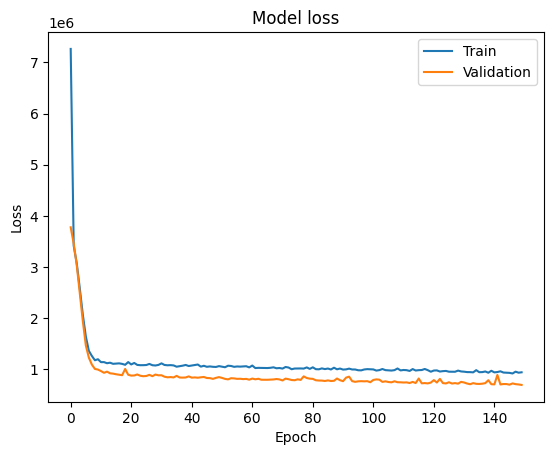

In [19]:
# To plot the training history, you need to train the model directly and capture the history, using best parameters defined above
history = create_model().fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=8, verbose=2)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Model with lover echos perform better gereralization

Epoch 1/150
10/10 - 1s - loss: 9632496.0000 - val_loss: 8729103.0000 - 510ms/epoch - 51ms/step
Epoch 2/150
10/10 - 0s - loss: 8095673.0000 - val_loss: 7231968.0000 - 27ms/epoch - 3ms/step
Epoch 3/150
10/10 - 0s - loss: 6584626.0000 - val_loss: 5815449.5000 - 30ms/epoch - 3ms/step
Epoch 4/150
10/10 - 0s - loss: 5204170.5000 - val_loss: 4601972.0000 - 32ms/epoch - 3ms/step
Epoch 5/150
10/10 - 0s - loss: 4140995.0000 - val_loss: 3890490.0000 - 30ms/epoch - 3ms/step
Epoch 6/150
10/10 - 0s - loss: 3569995.7500 - val_loss: 3667715.2500 - 34ms/epoch - 3ms/step
Epoch 7/150
10/10 - 0s - loss: 3444957.7500 - val_loss: 3653607.5000 - 29ms/epoch - 3ms/step
Epoch 8/150
10/10 - 0s - loss: 3412530.2500 - val_loss: 3618037.0000 - 35ms/epoch - 3ms/step
Epoch 9/150
10/10 - 0s - loss: 3357649.0000 - val_loss: 3545448.5000 - 30ms/epoch - 3ms/step
Epoch 10/150
10/10 - 0s - loss: 3302749.0000 - val_loss: 3481533.2500 - 27ms/epoch - 3ms/step
Epoch 11/150
10/10 - 0s - loss: 3244025.2500 - val_loss: 3420072.50

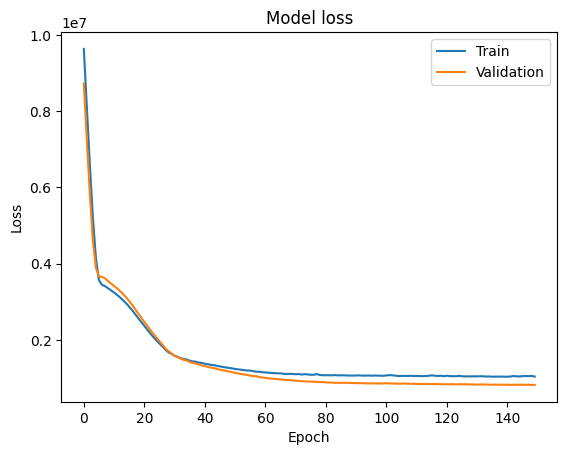

In [20]:
# To plot the training history, you need to train the model directly and capture the history, using best parameters defined above
history = create_model().fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=64, verbose=2)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Comparison with higher ebatch_size


## Results <a name="res"></a>

| Model               | Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) | R^2 Score | Parameters of best model  |
|---------------------|--------------------------|--------------------------------|-----------|-----------|
| KerasRegressor      | 691716.73                | 831.70                         | 0.67      | 'regressor__batch_size': 8, 'regressor__epochs': 150|

Interpretation:

The model performs pretty well with a high value of epoch (200) and a low value for batch_size (8). It is clear that the predictions fluctuate more in the model with a low batch_size but it generalizes very well and the loss function shows that the validation data has a lower loss at a higher epoch which indicates a good performance on the validation data as its neither over- or underfitting.